In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.optimize import curve_fit
from scipy.stats import probplot,shapiro
import os

In [2]:
chain_lengths=[25,50,75,100,125,150]
folders=[]
for i in chain_lengths:
    folders.append('../chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    if j==0:
        chain_rg_ree=pd.read_csv(file)
        chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
        chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
        chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
        chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
        chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
        chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5
        running_df=chain_rg_ree.copy()
    else:
        chain_rg_ree=pd.read_csv(file)
        chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
        chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
        chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
        chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
        chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
        chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5
        running_df=running_df.append(chain_rg_ree.copy())
    j+=1  

#     epas_considered = chain_rg_ree.epas.unique()
#     blank_df = pd.DataFrame()
#     for epas in chain_rg_ree.epas.unique():
#         if epas in epas_considered:
#             frames_number=len(chain_rg_ree[chain_rg_ree.epas==epas].index)
#             equil_frames=int(0.90*frames_number)
#             temp_df = chain_rg_ree[chain_rg_ree.epas==epas].iloc[-equil_frames:,:]
#             blank_df = blank_df.append(temp_df)
#     equil_chain_rg_ree=blank_df.copy()



# set epas for notebook

In [3]:
chain_rg_ree=running_df[running_df.epas==0.15]

# continue

In [4]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)    
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum


In [5]:
def running_mse(arr):
    mse=[]
    for i in range(arr.shape[0]):
        if i==0:
            difference_array = np.subtract(arr[i+1], arr[0])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())            
        else:
            difference_array = np.subtract(arr[i], arr[i-1])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())
    return mse    

In [6]:
#measure lsx/Rg = 1.5Rg
#change to random walk, by something to do with beads

# check what the data look like. make sure the frames are equilibrated

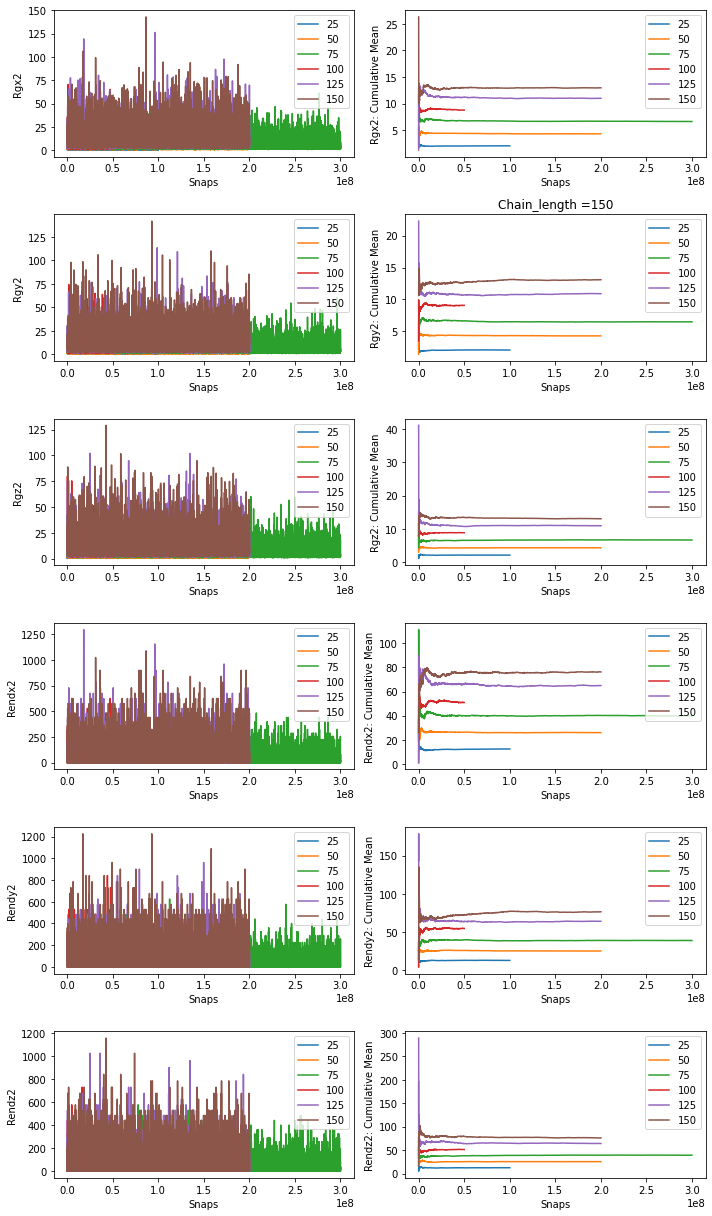

In [7]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,17))

for chain_length in chain_rg_ree.chain_length.unique():
    ax[0,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values,label=str(chain_length))
    
    ax[0,0].set_ylabel('Rgx2')
    ax[0,0].set_xlabel('Snaps')
    ax[0,0].legend()
    ax[0,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values),label=str(chain_length))
    ax[0,1].set_xlabel('Snaps')
    ax[0,1].set_ylabel('Rgx2: Cumulative Mean')

    ax[0,1].legend()
    ax[1,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values,label=str(chain_length))

    ax[1,0].set_ylabel('Rgy2')
    ax[1,0].set_xlabel('Snaps')
    ax[1,0].legend()    
    ax[1,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values),label=str(chain_length))
    ax[1,1].set_xlabel('Snaps')
    ax[1,1].set_ylabel('Rgy2: Cumulative Mean')
    ax[1,1].legend()    
    ax[1,1].set_title('Chain_length ='+str(chain_length))

    ax[2,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values,label=str(chain_length))
 
    ax[2,0].set_ylabel('Rgz2')
    ax[2,0].set_xlabel('Snaps')
    ax[2,0].legend()    
    ax[2,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values),label=str(chain_length))
    ax[2,1].set_xlabel('Snaps')
    ax[2,1].set_ylabel('Rgz2: Cumulative Mean')
   
    ax[2,1].legend()
    ax[3,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values,label=str(chain_length))
 
    ax[3,0].set_ylabel('Rendx2')
    ax[3,0].set_xlabel('Snaps')
    ax[3,0].legend()    
    ax[3,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values),label=str(chain_length))
    ax[3,1].set_xlabel('Snaps')
    ax[3,1].set_ylabel('Rendx2: Cumulative Mean')
 
    ax[3,1].legend()

    ax[4,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values,label=str(chain_length))
 
    ax[4,0].set_ylabel('Rendy2')
    ax[4,0].set_xlabel('Snaps')
    ax[4,0].legend()    
    ax[4,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values),label=str(chain_length))
    ax[4,1].set_xlabel('Snaps')
    ax[4,1].set_ylabel('Rendy2: Cumulative Mean')
 
    ax[4,1].legend()

    ax[5,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values,label=str(chain_length))
 
    ax[5,0].set_ylabel('Rendz2')
    ax[5,0].set_xlabel('Snaps')
    ax[5,0].legend()    
    ax[5,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values),label=str(chain_length))
    ax[5,1].set_xlabel('Snaps')
    ax[5,1].set_ylabel('Rendz2: Cumulative Mean')

    ax[5,1].legend()    
plt.tight_layout()

In [8]:
chain_rg_ree

frames  epas  chain_length  econf        Rgx        Rgy        Rgz  \
120120      10000  0.15            25   -4.2   5.606400   2.345600   1.830400   
120121      20000  0.15            25  -22.5   0.918400   5.030400   1.318400   
120122      30000  0.15            25  -36.6   1.465600   2.400000   0.518400   
120123      40000  0.15            25  -41.1   3.849600   2.880000   1.440000   
120124      50000  0.15            25  -64.8   1.798400   2.022400   0.726400   
...           ...   ...           ...    ...        ...        ...        ...   
130125  200120000  0.15           150   72.0   7.498889  10.187956   6.485556   
130126  200140000  0.15           150   76.8   6.889956  34.403733  14.505822   
130127  200160000  0.15           150   71.7  13.744400  15.398933   4.841956   
130128  200180000  0.15           150   76.8   6.879822  13.436667  10.267733   
130129  200200000  0.15           150   70.8   6.178489  17.624933   8.578489   

        Rendx  Rendy  Rendz  Rend2        Rg2      ratio  asphericity  \
120120   36.0   25.0   25.0   86.0   9.782400   8.791299     3.518400   
120121    9.0   49.0    0.0   58.0   7.267200   7.981066    -2.256000   
120122   25.0    4.0    1.0   30.0   4.384000   6.843066     0.006400   
120123   49.0   36.0    9.0   94.0   8.169600  11.506071     1.689600   
120124    0.0    4.0    0.0    4.0   4.547200   0.879662     0.424000   
...       ...    ...    ...    ...        ...        ...          ...   
130125   36.0    4.0    1.0   41.0  24.172400   1.696149    -0.837867   
130126   25.0  225.0   25.0  275.0  55.799511   4.928359   -17.564822   
130127  100.0   36.0    9.0  145.0  33.985289   4.266552     3.623956   
130128    0.0  144.0    1.0  145.0  30.584222   4.741007    -4.972378   
130129   36.0  196.0   81.0  313.0  32.381911   9.665890    -6.923222   

        acylindricity       RSA  
120120       0.515200  0.362547  
120121       3.712000  0.540415  
120122       1.881600  0.371698  
120123       1.440000  0.257049  
120124       1.296000  0.263852  
...               ...       ...  
130125       3.702400  0.137100  
130126      19.897911  0.440976  
130127      10.556978  0.289380  
130128       3.168933  0.185699  
130129       9.046444  0.322869  

[75060 rows x 16 columns]

In [9]:
# make sure to manually add ONLY the relevant/working chain length from chain_rg_ree in this below chain length list
chain_lengths_considered = chain_lengths
blank_df = pd.DataFrame()
for chain_length in chain_rg_ree.chain_length.unique():
    if chain_length in chain_lengths_considered:
        frames_number=len(chain_rg_ree[chain_rg_ree.chain_length==chain_length].index)
        equil_frames=int(0.90*frames_number)
        temp_df = chain_rg_ree[chain_rg_ree.chain_length==chain_length].iloc[-equil_frames:,:]
        blank_df = blank_df.append(temp_df)
equil_chain_rg_ree=blank_df.copy()
del blank_df, temp_df

In [10]:
equil_chain_rg_ree

frames  epas  chain_length    econf        Rgx        Rgy  \
121121   10020000  0.15            25 -16114.2   3.702400   1.910400   
121122   10030000  0.15            25 -16127.1   0.521600   3.065600   
121123   10040000  0.15            25 -16151.7   4.089600   1.238400   
121124   10050000  0.15            25 -16171.8   0.518400   1.840000   
121125   10060000  0.15            25 -16185.6   0.720000   5.817600   
...           ...   ...           ...      ...        ...        ...   
130125  200120000  0.15           150     72.0   7.498889  10.187956   
130126  200140000  0.15           150     76.8   6.889956  34.403733   
130127  200160000  0.15           150     71.7  13.744400  15.398933   
130128  200180000  0.15           150     76.8   6.879822  13.436667   
130129  200200000  0.15           150     70.8   6.178489  17.624933   

              Rgz  Rendx  Rendy  Rendz  Rend2        Rg2     ratio  \
121121   6.400000   25.0    4.0   81.0  110.0  12.012800  9.156899   
121122   2.240000    0.0   25.0   25.0   50.0   5.827200  8.580450   
121123   1.520000   36.0    4.0    4.0   44.0   6.848000  6.425234   
121124   1.526400    0.0   25.0    1.0   26.0   3.884800  6.692751   
121125   0.800000    4.0   64.0    4.0   72.0   7.337600  9.812473   
...           ...    ...    ...    ...    ...        ...       ...   
130125   6.485556   36.0    4.0    1.0   41.0  24.172400  1.696149   
130126  14.505822   25.0  225.0   25.0  275.0  55.799511  4.928359   
130127   4.841956  100.0   36.0    9.0  145.0  33.985289  4.266552   
130128  10.267733    0.0  144.0    1.0  145.0  30.584222  4.741007   
130129   8.578489   36.0  196.0   81.0  313.0  32.381911  9.665890   

        asphericity  acylindricity       RSA  
121121    -0.452800      -4.489600  0.325851  
121122    -2.131200       0.825600  0.385766  
121123     2.710400      -0.281600  0.397393  
121124    -1.164800       0.313600  0.307878  
121125    -2.588800       5.017600  0.689336  
...             ...            ...       ...  
130125    -0.837867       3.702400  0.137100  
130126   -17.564822      19.897911  0.440976  
130127     3.623956      10.556978  0.289380  
130128    -4.972378       3.168933  0.185699  
130129    -6.923222       9.046444  0.322869  

[67554 rows x 16 columns]

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


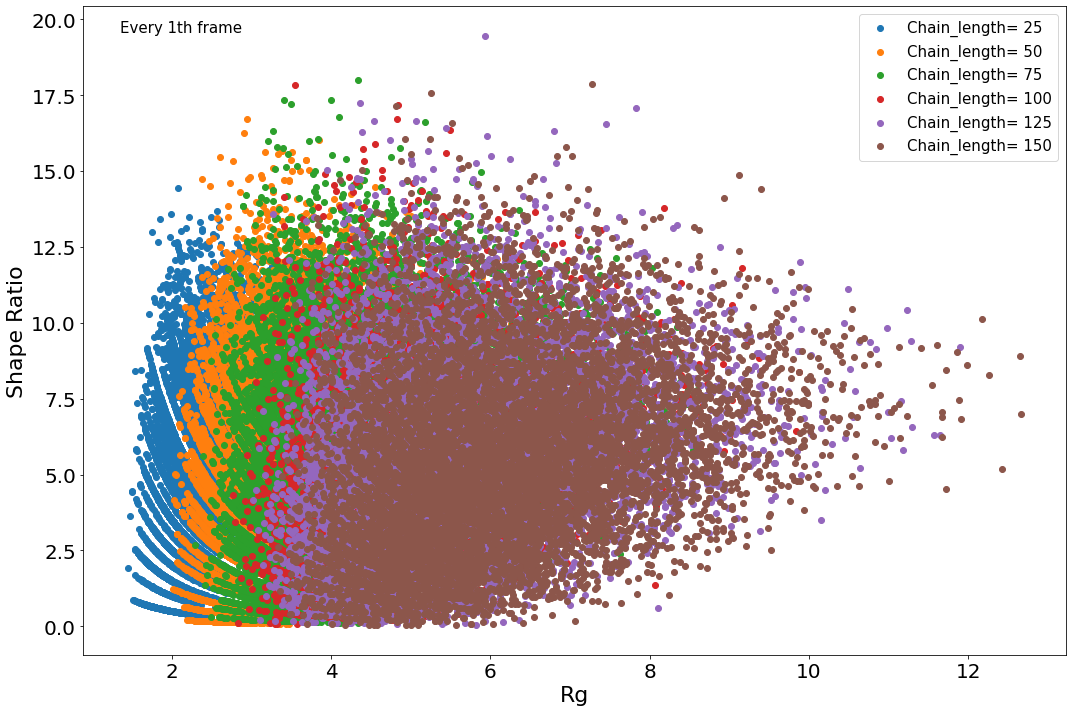

In [11]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


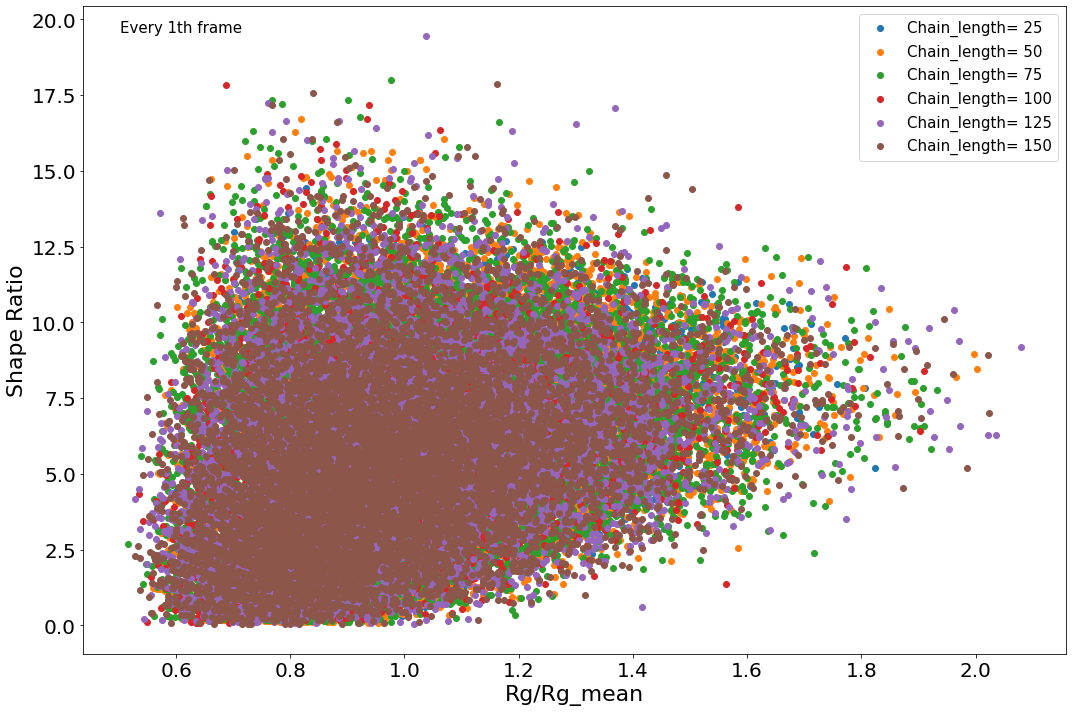

In [12]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()


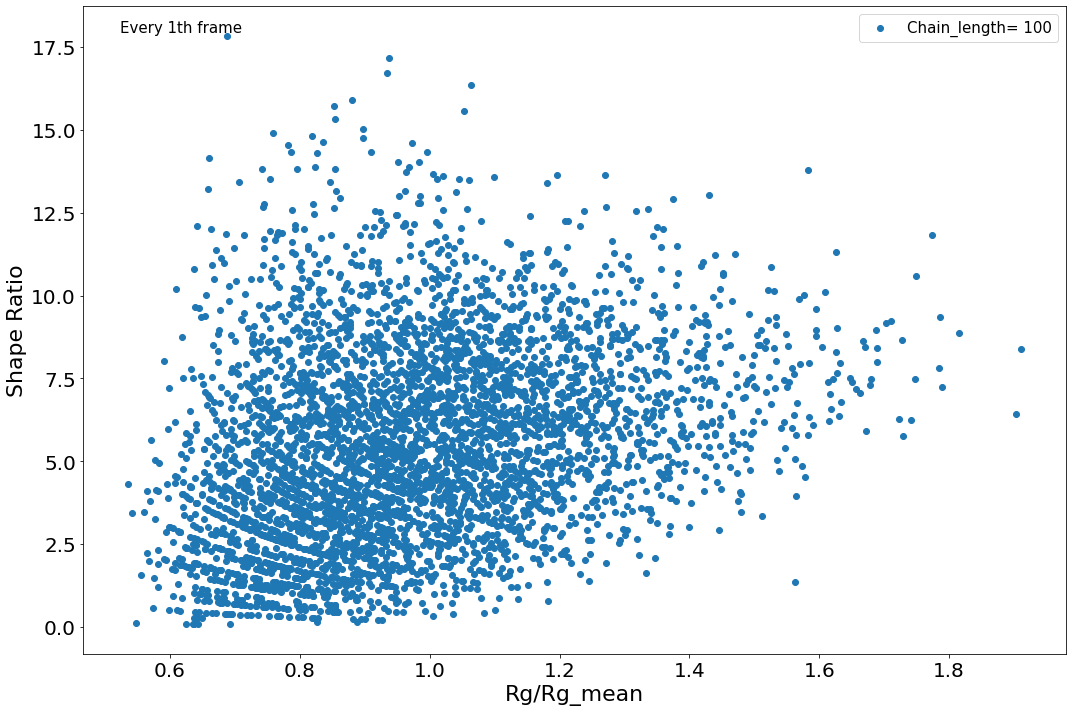

In [13]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    if i==100:
        ax.scatter((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values)**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5,
                   equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
                label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Rg/Rg_mean',fontsize=22)
ax.set_ylabel('Shape Ratio',fontsize=22)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


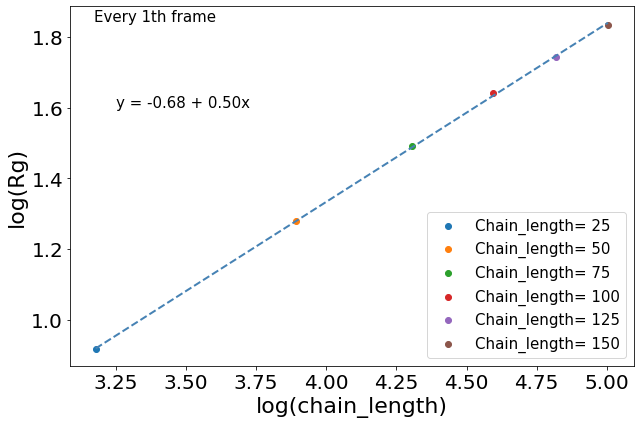

In [14]:
#use i-1 because there are i-1 bonds
fig,ax = plt.subplots(figsize=(9,6))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(np.log(i-1),np.log((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5),
            label='Chain_length= '+str(i))
ax.legend(fontsize=15,loc='lower right')
ax.set_xlabel('log(chain_length)',fontsize=22)
ax.set_ylabel('log(Rg)',fontsize=22)
x=np.array([np.log(i-1) for i in equil_chain_rg_ree.chain_length.unique()])
y=np.array([np.log((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values.mean())**0.5) for i in equil_chain_rg_ree.chain_length.unique()])
a, b = np.polyfit(x, y, 1)
ax.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)
ax.text(0.15,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
#plt.set_title('')
ax.text(3.25, 1.6, 'y = ' + '{:.02f}'.format(b) + ' + {:.02f}'.format(a) + 'x', size=14,fontsize=15)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


In [15]:
equil_chain_rg_ree.ratio.mean

<bound method Series.mean of 121121    9.156899
121122    8.580450
121123    6.425234
121124    6.692751
121125    9.812473
            ...   
130125    1.696149
130126    4.928359
130127    4.266552
130128    4.741007
130129    9.665890
Name: ratio, Length: 67554, dtype: float64>

In [16]:
np.log(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==25].Rg2.values.mean())

1.8333219882491472

mean=  0.37864702324201205 for run =  25 std=  0.1747319715541463 error =  0.0018409164723062659
mean=  0.3622180972453076 for run =  50 std=  0.17029082720808597 error =  0.0012689556859966254
mean=  0.3611243205741028 for run =  75 std=  0.17020075639700447 error =  0.0012682845055828702
mean=  0.36238041552335276 for run =  100 std=  0.17072699710135844 error =  0.0025425065708330995
mean=  0.35400776510135606 for run =  125 std=  0.1700955574667337 error =  0.0017920687944025927
mean=  0.3547420355697637 for run =  150 std=  0.16823531181193155 error =  0.0017724698804888893


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if sys.path[0] == '':


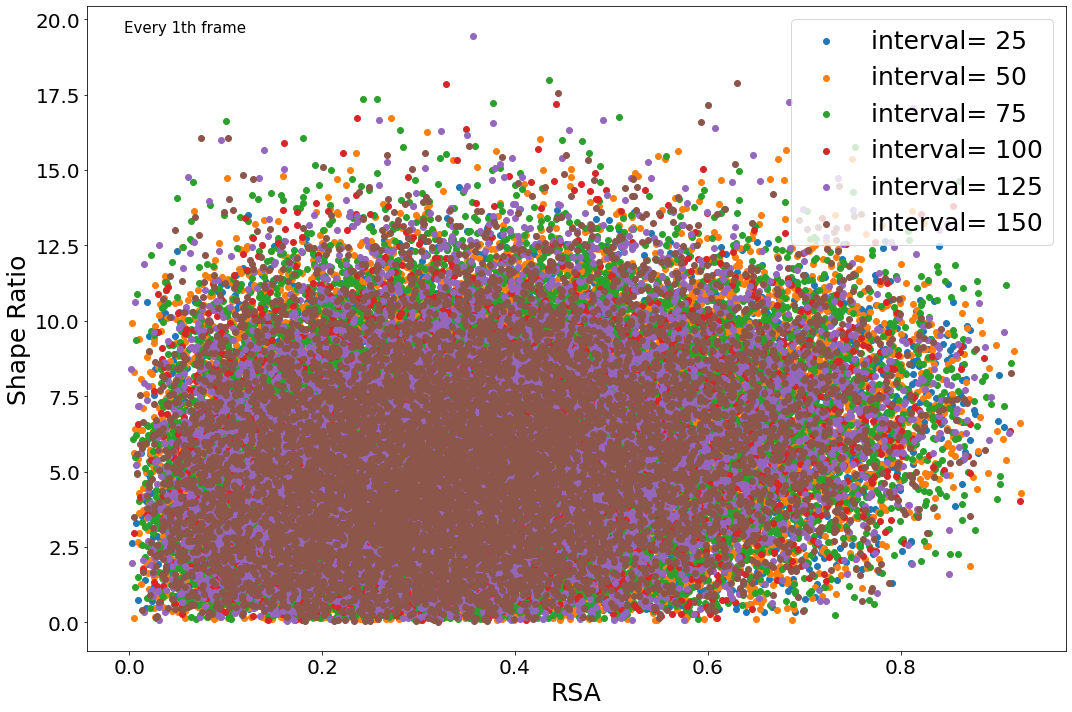

In [17]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].RSA.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
    print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].RSA.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('RSA',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


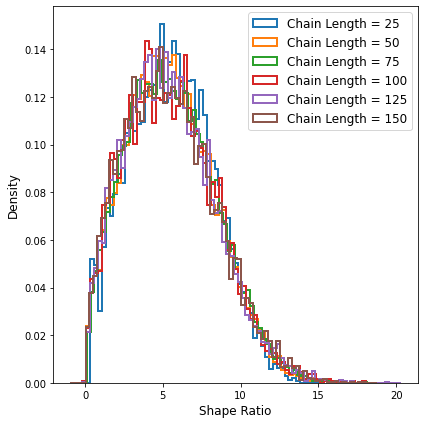

In [18]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.max()+1,0.25),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Shape Ratio",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [19]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean shape ratio for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].ratio.values.std(),'0.2f'))
    

The mean shape ratio for chain length  25  is 5.58 with standard deviation  2.66
The mean shape ratio for chain length  50  is 5.49 with standard deviation  2.78
The mean shape ratio for chain length  75  is 5.56 with standard deviation  2.84
The mean shape ratio for chain length  100  is 5.51 with standard deviation  2.90
The mean shape ratio for chain length  125  is 5.47 with standard deviation  2.89
The mean shape ratio for chain length  150  is 5.49 with standard deviation  2.93


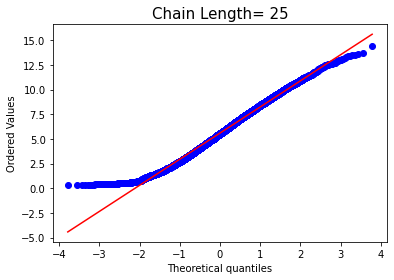

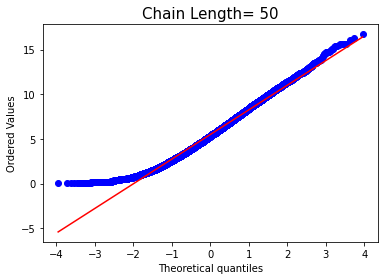

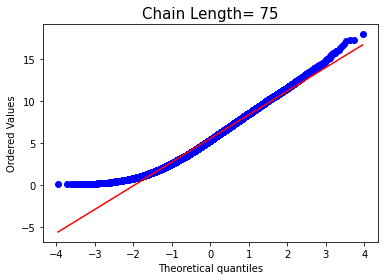

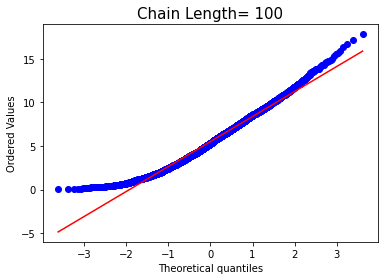

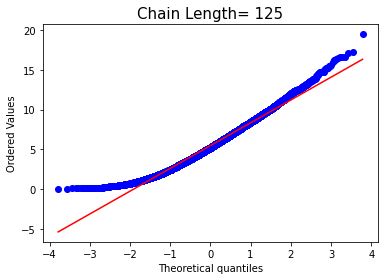

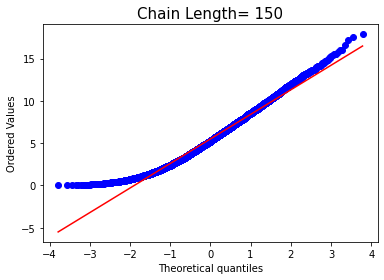

In [20]:
#Q-Q plot
#Shape Ratio
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

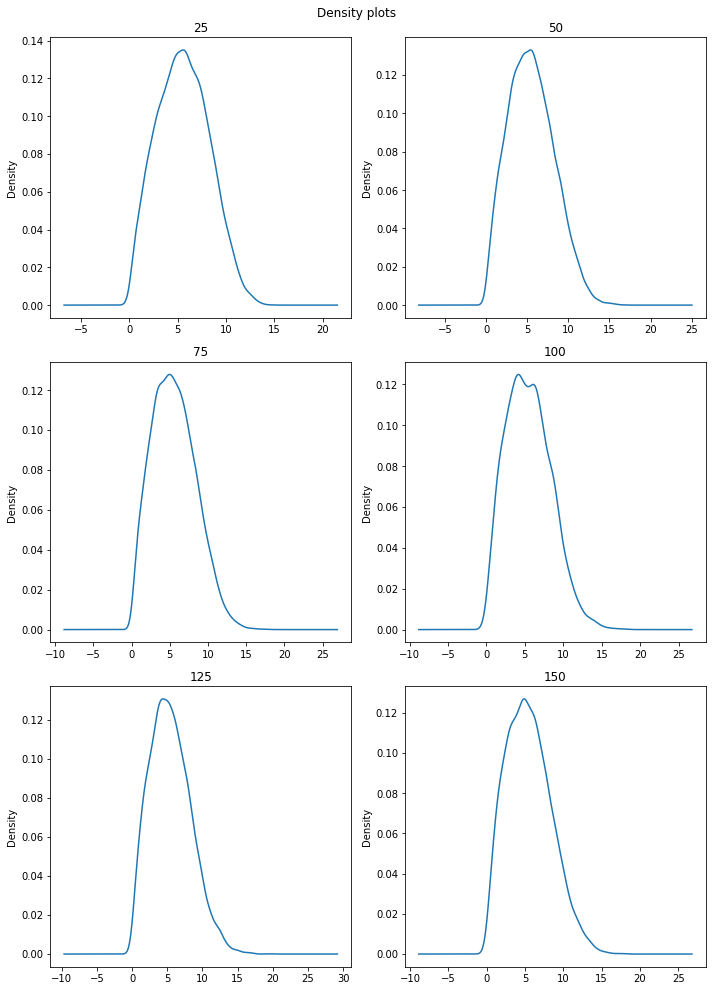

In [21]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].ratio.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

In [22]:
for i in equil_chain_rg_ree.chain_length.unique():
    print(f'{i}: {"Not Gaussian" if shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)[1]<0.05 else "Gaussian"}  {shapiro(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio)}')


25: Not Gaussian  ShapiroResult(statistic=0.9892905950546265, pvalue=1.6337388233217677e-25)
50: Not Gaussian  ShapiroResult(statistic=0.9861728549003601, pvalue=4.162920865358208e-38)
75: Not Gaussian  ShapiroResult(statistic=0.9838771224021912, pvalue=1.7316966162433224e-40)
100: Not Gaussian  ShapiroResult(statistic=0.9809476137161255, pvalue=3.608123562736073e-24)
125: Not Gaussian  ShapiroResult(statistic=0.979979395866394, pvalue=1.0455050631014896e-33)
150: Not Gaussian  ShapiroResult(statistic=0.9802420139312744, pvalue=1.601945517872374e-33)


/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/hshadman/

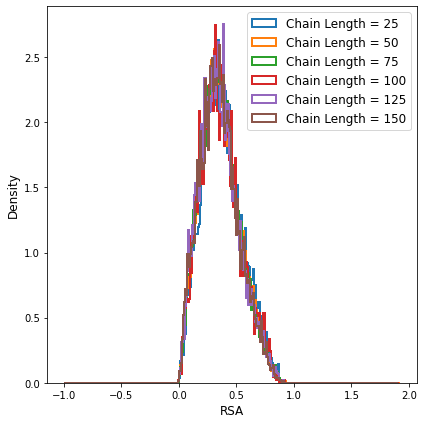

In [23]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    n,bins,patches=plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.min()-1,
                                        equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.max()+1,0.01),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('RSA distribution',fontsize=25)
plt.xlabel("RSA",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


In [24]:
for chain_length in equil_chain_rg_ree.chain_length.unique():
    print('The mean RSA for chain length ',str(chain_length),' is',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.mean(),'0.2f'),
         'with standard deviation ',
          format(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].RSA.values.std(),'0.2f'))
    

The mean RSA for chain length  25  is 0.38 with standard deviation  0.17
The mean RSA for chain length  50  is 0.36 with standard deviation  0.17
The mean RSA for chain length  75  is 0.36 with standard deviation  0.17
The mean RSA for chain length  100  is 0.36 with standard deviation  0.17
The mean RSA for chain length  125  is 0.35 with standard deviation  0.17
The mean RSA for chain length  150  is 0.35 with standard deviation  0.17


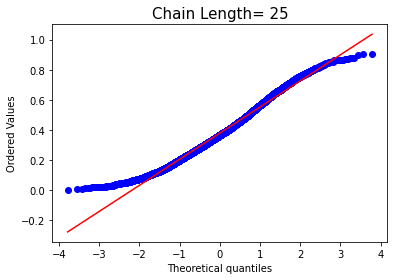

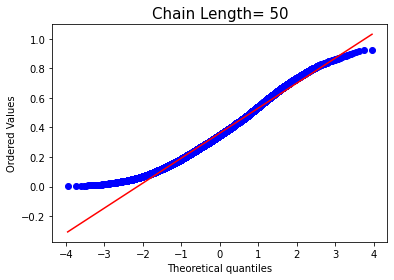

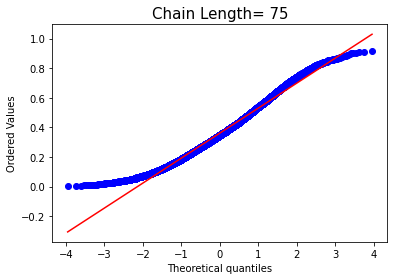

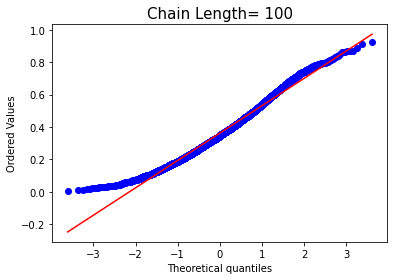

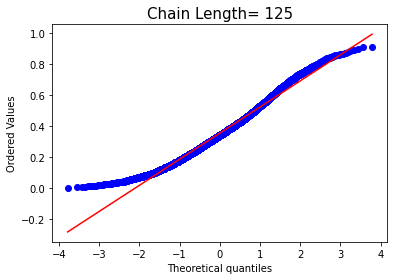

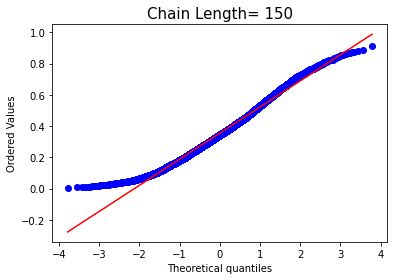

In [25]:
#Q-Q plot
#RSA
for i in equil_chain_rg_ree.chain_length.unique():
    probplot(x=equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].RSA,dist='norm',plot=plt)
    plt.title('Chain Length= '+str(i),fontsize=15)
    plt.show()


/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/public/apps/python/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/too

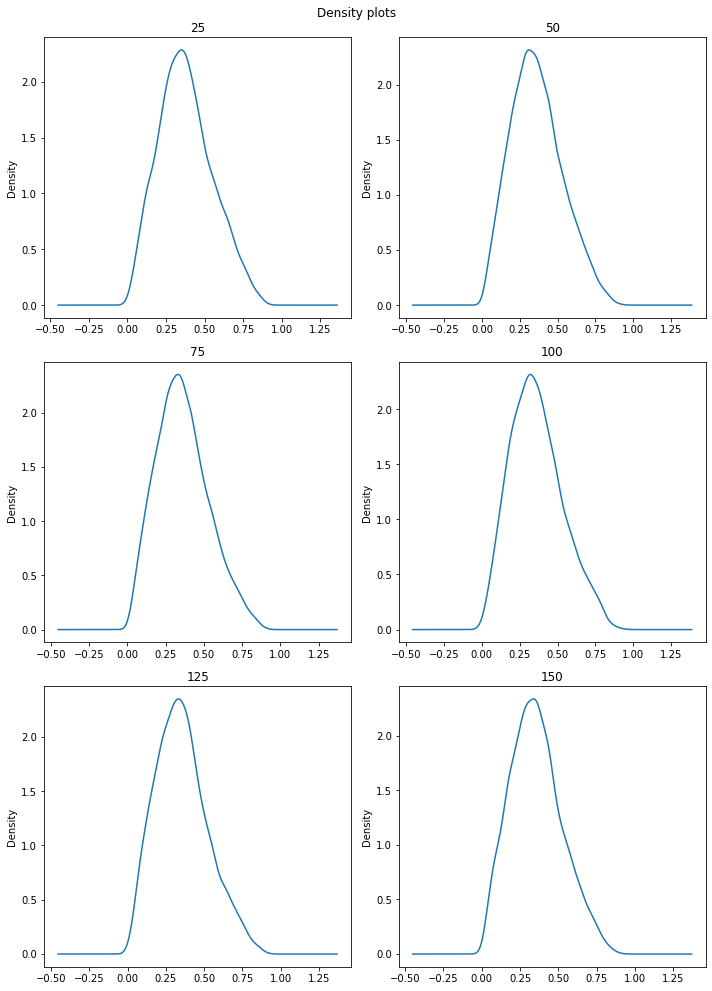

In [26]:
#Density plot
fig,ax = plt.subplots(3,2,figsize=(10,14))
row = col = 0
for n,c in enumerate(equil_chain_rg_ree.chain_length.unique()):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    equil_chain_rg_ree[equil_chain_rg_ree.chain_length==c].RSA.plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(c)
    col += 1
plt.suptitle("Density plots")
plt.tight_layout()

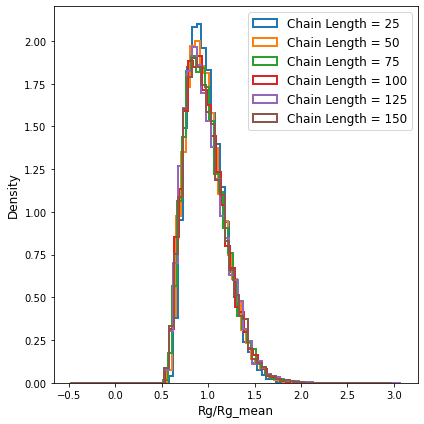

In [27]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,linewidth=2,bins=np.arange(((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).min()-1,
                                        ((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5)/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean()**0.5)).max()+1,0.05))
    
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rg/Rg_mean",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


/public/apps/python/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]


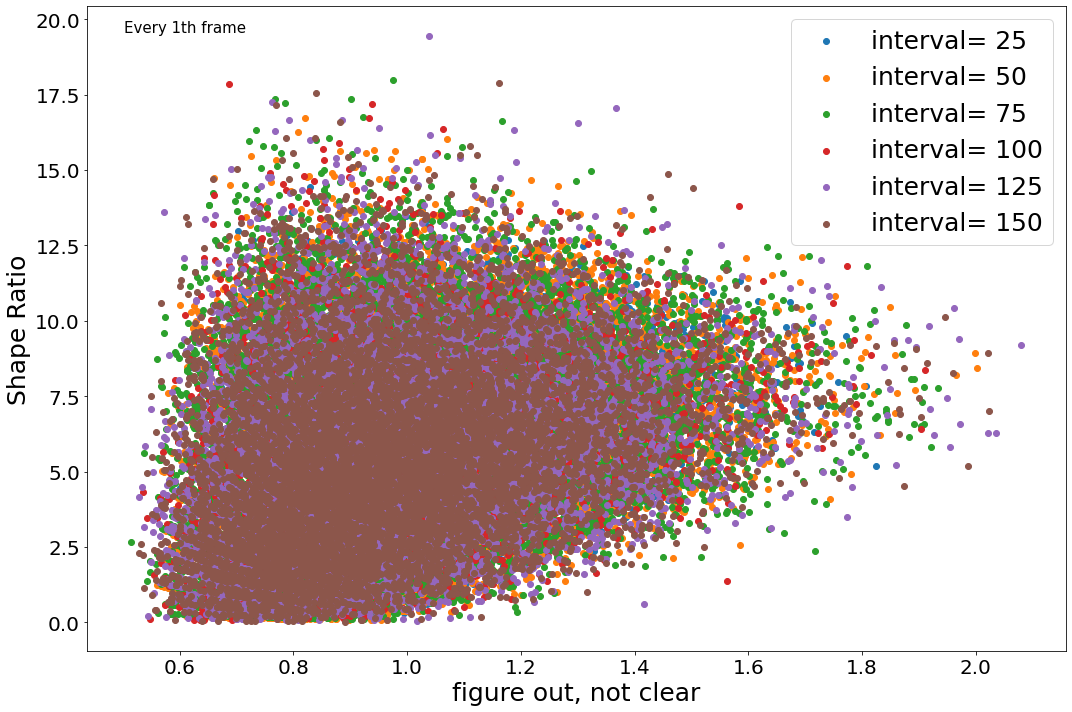

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values.mean())**0.5,
               equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
#    print('mean Rg/Rg_mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.mean())**0.5.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5/(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values.std())**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('figure out, not clear',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
ax.text(0.1,0.96,'Every '+str(every_ith_frame)+'th frame',fontsize=15,horizontalAlignment='center',transform=ax.transAxes)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


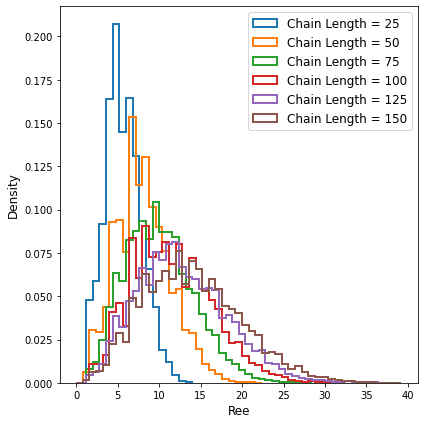

In [29]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5,
             label='Chain Length = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).min()-1,
                                        (equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).max()+1,0.8),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Ree",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


# dont look beyond this line

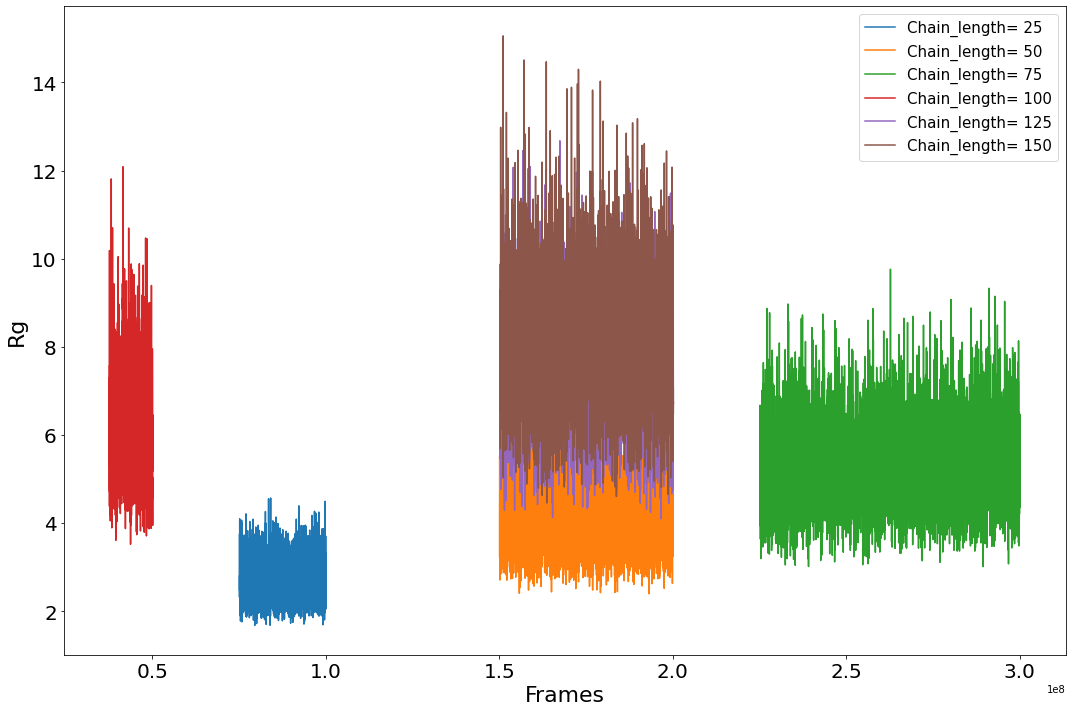

In [90]:
fig,ax = plt.subplots(figsize=(15,10))
for i in equil_chain_rg_ree.chain_length.unique():
    ax.plot(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].frames.values,(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.values)**0.5,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rg',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

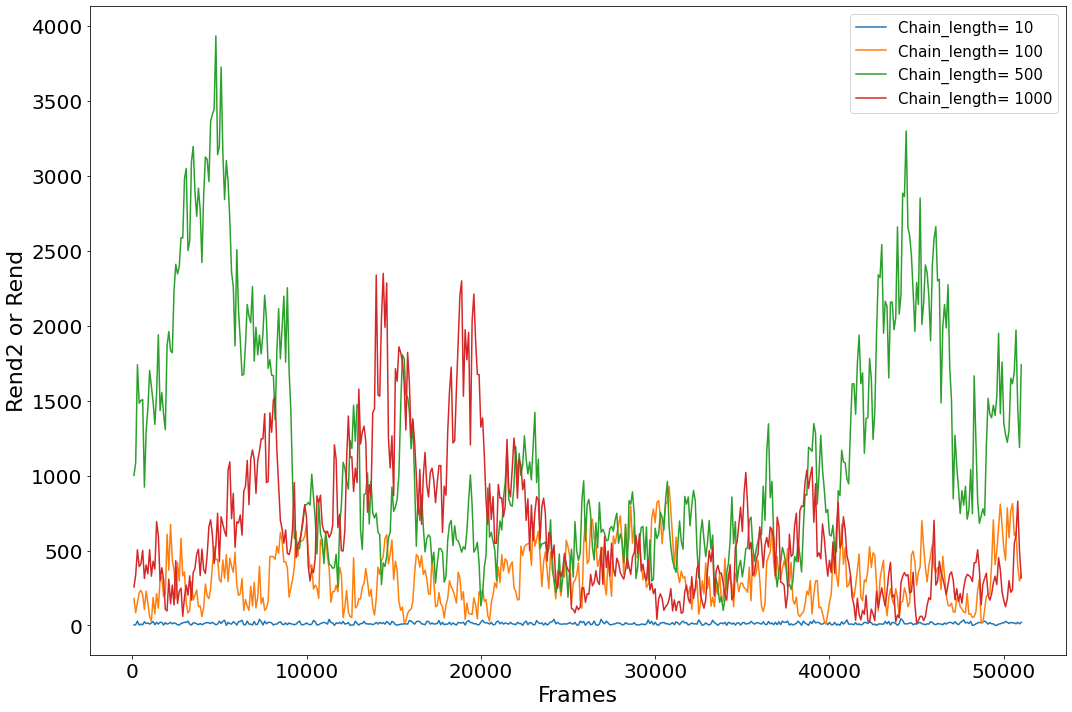

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
for i in chain_rg_ree.chain_length.unique():
    ax.plot(chain_rg_ree[chain_rg_ree.chain_length==i].frames.values,chain_rg_ree[chain_rg_ree.chain_length==i].Rend2.values,
            label='Chain_length= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rend2 or Rend',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

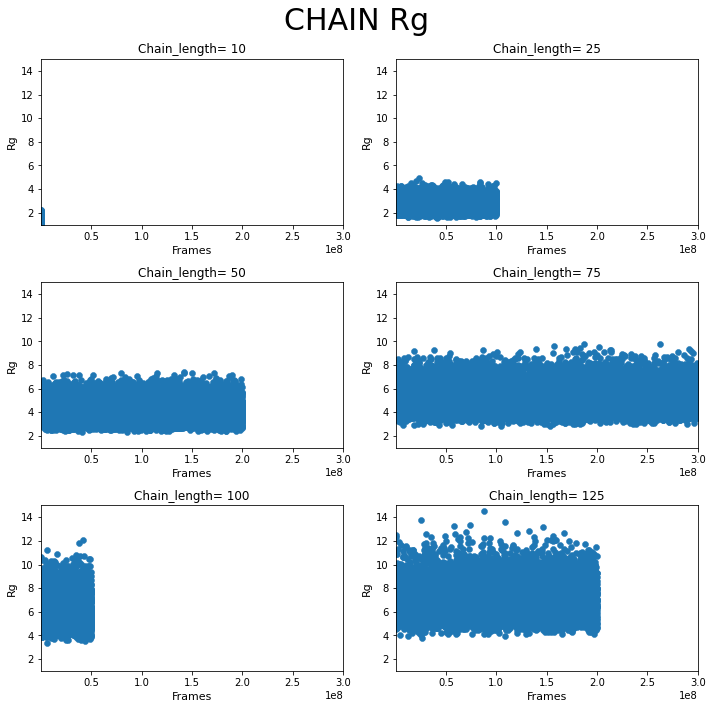

In [94]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
counter=0
states=chain_rg_ree.chain_length.unique()
for x_dim in range(1,axs.shape[0]+1):
    for y_dim in range(1,axs.shape[1]+1):
        if counter<len(states):
            axs[x_dim-1,y_dim-1].scatter(chain_rg_ree[chain_rg_ree.chain_length==states[counter]].frames.values,
                                         (chain_rg_ree[chain_rg_ree.chain_length==states[counter]].Rg2.values)**0.5,
                                      linewidth=0.5)
            axs[x_dim-1,y_dim-1].set_title('Chain_length= '+str(states[counter]),fontsize=12)
            axs[x_dim-1,y_dim-1].set_ylabel('Rg',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlabel('Frames',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlim(int(chain_rg_ree.frames.values.min()),int(chain_rg_ree.frames.values.max()))
            axs[x_dim-1,y_dim-1].set_ylim(int(chain_rg_ree.Rg2.values.min()**0.5),int(chain_rg_ree.Rg2.values.max()**0.5))
        counter+=1
fig.suptitle('CHAIN Rg',fontsize=30)
plt.tight_layout()


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.39 µs


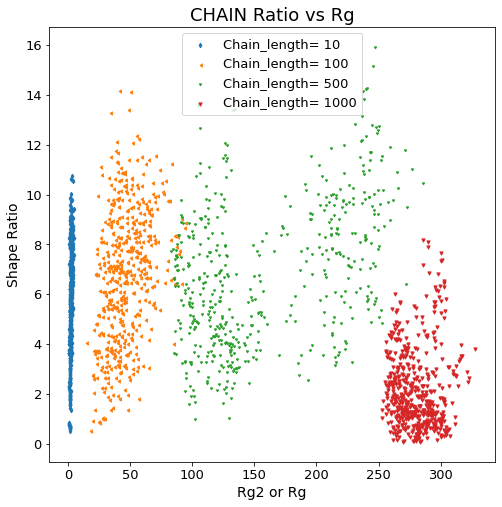

In [21]:
#IGNORE
%time
%matplotlib inline
plt.rcParams["font.weight"] = "regular"
plt.rcParams["axes.labelweight"] = "regular"
fig,ax = plt.subplots(figsize=(8,8))
temp_chain= chain_rg_ree.copy()
scatter_markers=['d',4,'1','v']
j=0
for chain_length in temp_chain.chain_length.unique():
    ax.scatter(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values,
               chain_rg_ree[chain_rg_ree.chain_length==chain_length].ratio.values,
               marker=scatter_markers[j],s=10,alpha=1,
                                      label='Chain_length= '+str(chain_length))
    j+=1
ax.set_xlabel('Rg2 or Rg',fontsize=14)
ax.set_ylabel('Shape Ratio',fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=13)
plt.setp(ax.get_xticklabels(), fontsize=13)
ax.legend(fontsize=13)
ax.set_title('CHAIN Ratio vs Rg',fontsize=18) #Ratio vs Rg
del temp_chain